# Vectorization

### 1. 단어 수 기반 벡터화
- Bag of Words (BoW) : 각 단어의 등장 횟수를 세서 벡터로 표현
- TF-IDF : 흔하게 등장하는 단어에는 낮은 가중치를, 특정 문서에만 자주 등장하는 단어엔 높은 가중치
    - 계산식
    $$
   \text{TF}(t, d) = \frac{\text{단어 } t \text{가 문서 } d \text{에 등장한 횟수}}{\text{문서 } d \text{의 총 단어 수}}
   $$

   $$
   \text{IDF}(t, D) = \log \left( \frac{|D|}{|\{d \in D : t \in d\}|} \right)
   $$
   
    - \( |D| \): 전체 문서 수
    - \( \{d \in D : t \in d\} \): 단어 \( t \)가 포함된 문서의 집합



### 2. 단어 임베딩 기반 벡터화

- 단어와 주변 단어(context) 사이의 관계를 예측하여 의미를 반영한 고차원 실수 벡터 학습
    - e.g. `king - man + woman ≈ queen`
- 종류
    - Word2Vec : 단어의 의미를 벡터 공간 상에 표현하는 임베딩 방법으로, 의미가 비슷한 단어는 벡터 거리 가깝게 학습됨
        - 의미가 비슷한 단어는 어떻게 정의? 비슷한 문맥(context)에서 사용됨
        - 종류
            - CBOW (Continuous Bag of Words) : 주변 단어들을 보고 중심 단어를 예측 (일반적인 단어에 유리)
            - Skip-gram : 중심 단어를 보고 주변 단어를 예측 (희귀 단어에 유리)
        - 사실상 간단한 신경망 (1 hidden layer)
            - 입력층 : One-hot 벡터 (어휘 수 V 차원)
            - 은닉층 : Embedding matrix W (V X N) -> **단어를 N차원 임베딩으로 변환**
            - 출력층 : Softmax 확률 분포 -> 예측 결과
    - GloVe
    - FastText

In [71]:
import pandas as pd
from IPython.display import display

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

docs = [
    "나는 콜드플레이 노래를 좋아한다",
    "디즈니 영화를 보고있다",
    "좋은 날씨에 종종 테니스를 친다",
    "좋은 날씨에 잔다",
    "영화가 좋은 나는 영화를 본다",
    "콜드플레이는 영화를 찍은 적이 있나?",
    "날씨가 좋아야 밖에 나간다",
    "테니스 만화는 테니스를 내용이다 그것이 테니스니까"
]

In [72]:
from kiwipiepy import Kiwi

kiwi = Kiwi()  # Korean Intelligent Word Identifier
docs_kiwi = []

for d in docs:
    result = kiwi.analyze(d)
    tokens = [token.form for token in result[0][0]]  # tag : 품사
    
    docs_kiwi.append(tokens)

docs_kiwi

[['나', '는', '콜드플레이', '노래', '를', '좋아하', 'ᆫ다'],
 ['디즈니', '영화', '를', '보', '고', '있', '다'],
 ['좋', '은', '날씨', '에', '종종', '테니스', '를', '치', 'ᆫ다'],
 ['좋', '은', '날씨', '에', '자', 'ᆫ다'],
 ['영화', '가', '좋', '은', '나', '는', '영화', '를', '보', 'ᆫ다'],
 ['콜드플레이', '는', '영화', '를', '찍', '은', '적', '이', '있', '나', '?'],
 ['날씨', '가', '좋', '어야', '밖', '에', '나가', 'ᆫ다'],
 ['테니스', '만화', '는', '테니스', '를', '내용', '이', '다', '그것', '이', '테니스', '이', '니까']]

In [73]:
# 1. BoW
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform([" ".join(tokens) for tokens in docs_kiwi])

print("BoW feature names:", bow_vectorizer.get_feature_names_out())  # 사전 순 단어 정렬
print("Bow vector:\n", bow.toarray())

BoW feature names: ['ᆫ다' '그것' '나가' '날씨' '내용' '노래' '니까' '디즈니' '만화' '어야' '영화' '종종' '좋아하'
 '콜드플레이' '테니스']
Bow vector:
 [[1 0 0 0 0 1 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 1 0 0 0 0 0 3]]


In [74]:
# 2. TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform([" ".join(tokens) for tokens in docs_kiwi])

print("TF_IDF feature names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF vector:\n")
display(pd.DataFrame(tfidf.toarray(), columns=bow_vectorizer.get_feature_names_out()))

TF_IDF feature names: ['ᆫ다' '그것' '나가' '날씨' '내용' '노래' '니까' '디즈니' '만화' '어야' '영화' '종종' '좋아하'
 '콜드플레이' '테니스']
TF-IDF vector:



,ᆫ다,그것,나가,날씨,내용,노래,니까,디즈니,만화,어야,영화,종종,좋아하,콜드플레이,테니스
0,0.323114,0.000000,0.000000,0.000000,0.000000,0.575683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.575683,0.482467,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.810306,0.000000,0.000000,0.586007,0.000000,0.000000,0.000000,0.000000
2,0.352144,0.000000,0.000000,0.453735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.627406,0.000000,0.000000,0.525815
3,0.613115,0.000000,0.000000,0.789994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.361767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932268,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.653308,0.000000,0.000000,0.757092,0.000000
6,0.333168,0.000000,0.593597,0.429285,0.000000,0.000000,0.000000,0.000000,0.000000,0.593597,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.311266,0.000000,0.000000,0.311266,0.000000,0.311266,0.000000,0.311266,0.000000,0.000000,0.000000,0.000000,0.000000,0.782595


In [13]:
# 3. Word2Vec

In [109]:
# 3-1) Pytorch 직접 구현

In [132]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [187]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

corpus = remove_stop_words(corpus)

words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = sorted(set(words))
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

word2int

{'boy': 0,
 'girl': 1,
 'king': 2,
 'man': 3,
 'pretty': 4,
 'prince': 5,
 'princess': 6,
 'queen': 7,
 'strong': 8,
 'wise': 9,
 'woman': 10,
 'young': 11}

In [188]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

df = pd.DataFrame(data, columns = ['input', 'label'])
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [189]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # TensorFlow version : 2.X -> 1.X

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))

X_train = np.asarray(X)
Y_train = np.asarray(Y)

print(X_train[:1])
print(Y_train[:1])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [190]:
# making placeholders for X_train and Y_train
# 참고 : 텐서는 딥러닝 프레임워크(PyTorch, TensorFlow)에서 사용하는 핵심 다차원 숫자 배열 데이터 구조
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

In [197]:
# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2  # 단어 벡터를 2차원 공간에 표현할 것

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias

# embedding calculation
hidden_layer = tf.add(tf.matmul(x,W1), b1)  # 원-핫 벡터와 임베딩 행렬 곱 -> 단어의 임베딩 벡터 (e.g. [0.8, -0.4] + 0.3)

In [198]:
# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))  # 임베딩 벡터(2차원)을 원-핫 차원(단어 수)만큼 바꾸는 가중치 (임베딩 -> 예측값 변환)
b2 = tf.Variable(tf.random_normal([ONE_HOT_DIM]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2)) # softmax 통해 확률로 변환

In [199]:
# loss function: cross entropy*
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# 경사하강법 이용하여 loss 줄이는 방향으로 W1, W2, b1, b2 업데이트
# 학습률 = 0.05
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [208]:
# Train
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)  # 그래프 실행 시작

iteration = 50000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train}) # forward -> loss -> backward
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))


iteration 0 loss is :  3.384005
iteration 3000 loss is :  1.7858791
iteration 6000 loss is :  1.709772
iteration 9000 loss is :  1.653898
iteration 12000 loss is :  1.6302898
iteration 15000 loss is :  1.6188227
iteration 18000 loss is :  1.6113681
iteration 21000 loss is :  1.6060891
iteration 24000 loss is :  1.602145
iteration 27000 loss is :  1.5990493
iteration 30000 loss is :  1.5965189
iteration 33000 loss is :  1.5943835
iteration 36000 loss is :  1.5925363
iteration 39000 loss is :  1.590907
iteration 42000 loss is :  1.5894479
iteration 45000 loss is :  1.588126
iteration 48000 loss is :  1.586918


In [209]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)  # 우리가 필요한 벡터는 hidden layer, 즉 임베딩 벡터 = W1 + b1
print(vectors)

[[-0.96775514  2.0214005 ]
 [ 1.0311434  -1.5302474 ]
 [-0.4470016   3.8625321 ]
 [-0.34388936  4.99887   ]
 [-2.5304542  -3.6938646 ]
 [-0.769731    3.6988237 ]
 [ 0.2875303  -0.72124606]
 [ 3.4658618  -1.9709558 ]
 [-5.500673   -0.7133724 ]
 [-1.0152829  -1.3371499 ]
 [ 3.7606015  -1.2895112 ]
 [-1.874716   -1.1279302 ]]


In [210]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,boy,-0.967755,2.021400
1,girl,1.031143,-1.530247
2,king,-0.447002,3.862532
3,man,-0.343889,4.998870
4,pretty,-2.530454,-3.693865
5,prince,-0.769731,3.698824
6,princess,0.287530,-0.721246
7,queen,3.465862,-1.970956
8,strong,-5.500673,-0.713372
9,wise,-1.015283,-1.337150


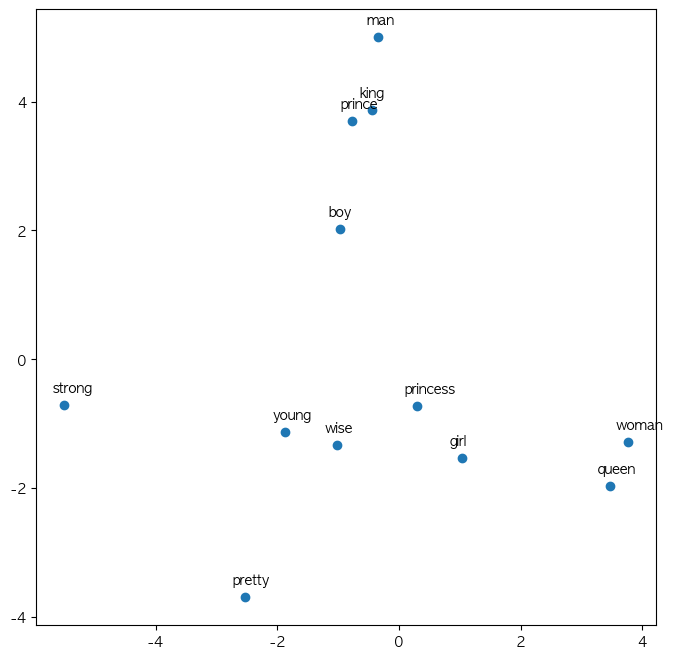

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(w2v_df['x1'], w2v_df['x2'])
 
for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1-0.2, x2+0.2))

plt.show()

`king - man + woman ≈ queen`

In [108]:
# 3-2) gensim 라이브러리 활용

In [ ]:
import urllib.request
import pandas as pd

from gensim.models import Word2Vec
from kiwipiepy import Kiwi

In [29]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="data/ratings.txt")
train_data  = pd.read_table('data/ratings.txt')
train_data = train_data.loc[~train_data['document'].isnull()]
train_data  # label : 긍정(1), 부정(0)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [30]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [46]:
kiwi = Kiwi()
tokenized_data = []

for idx, sentence in enumerate(train_data['document']):
    try:
        # 형태소 분석
        tokens = kiwi.tokenize(sentence)

        # 조사, 구두점 제거
        filtered_tokens = [
            token.form for token in tokens
            if token.tag != 'Josa' and token.tag != 'Punctuation'
        ]

        # 불용어 제거
        meaningful_tokens = [
            word for word in filtered_tokens
            if word not in stopwords
        ]

        tokenized_data.append(meaningful_tokens)
        
        if idx == 1:
            print(f"> 형태소 분석 결과 : {tokens}")
            print(f"> 조사, 구두점 제거 결과 : {filtered_tokens}")
            print(f"> 불용어 제거 결과 : {meaningful_tokens}")
    except Exception as e:
        print(f"Error at idx {idx}: {sentence}")

> 형태소 분석 결과 : [Token(form='디자인', tag='NNG', start=0, len=3), Token(form='을', tag='JKO', start=3, len=1), Token(form='배우', tag='VV', start=5, len=2), Token(form='는', tag='ETM', start=7, len=1), Token(form='학생', tag='NNG', start=9, len=2), Token(form='으로', tag='JKB', start=11, len=2), Token(form=',', tag='SP', start=13, len=1), Token(form='외국', tag='NNG', start=15, len=2), Token(form='디자이너', tag='NNG', start=17, len=4), Token(form='와', tag='JC', start=21, len=1), Token(form='그', tag='NP', start=23, len=1), Token(form='들', tag='XSN', start=24, len=1), Token(form='이', tag='JKS', start=25, len=1), Token(form='일구', tag='VV', start=27, len=2), Token(form='ᆫ', tag='ETM', start=28, len=1), Token(form='전통', tag='NNG', start=30, len=2), Token(form='을', tag='JKO', start=32, len=1), Token(form='통하', tag='VV', start=34, len=2), Token(form='어', tag='EC', start=35, len=1), Token(form='발전', tag='NNG', start=37, len=2), Token(form='하', tag='XSV', start=39, len=1), Token(form='어', tag='EC', start=39, len

In [56]:
model = Word2Vec(
    sentences=tokenized_data,  # 학습할 문장(토큰화된 리스트)
    vector_size=100,           # 각 단어 벡터의 차원 수
    window=5,                  # 문맥 윈도우 크기 (앞뒤 몇 개 단어를 볼지)
    min_count=5,               # 최소 등장 횟수 (이보다 적게 등장한 단어는 무시)
    workers=4,                 # 학습에 사용할 CPU 코어 수
    sg=0                       # 0: CBOW / 1: Skip-Gram
)

print(model.wv.vectors.shape)   # (단어 수, 벡터 차원 수)
print(model.wv.index_to_key[3])
print(model.wv.vectors[3])


(15751, 100)
영화
[ 0.06957819  2.6163177   0.7113186   1.4739836   0.42937443  0.20286524
  1.603551   -0.4120754  -0.13358973  0.1929245   1.0055006   0.01667816
  0.27345392 -0.34737015  0.3620748   1.7680372   0.17867003  1.2337723
 -1.0722377   2.6277971  -0.6033806  -1.3318422   0.8233016   1.4192412
 -0.0129594   1.3488612  -1.2086397   1.3100741   0.9267957  -0.11300571
  0.22803517 -0.41419238 -0.19817929 -1.4238498  -0.54367304  0.89930487
  0.28453025 -1.7810371   0.48578542 -0.9816632   1.3025243  -0.13048983
  0.37264073 -0.9406064  -0.7853206   0.41981387  1.027189   -2.0087469
 -1.9460719  -0.588013   -0.50462306  1.2413745  -1.4189456  -1.5822421
 -1.2493838  -0.04985215 -1.6165613   1.2290796   1.2390999   1.1257265
 -1.4958955  -0.0146298  -0.4634209   0.01621612  1.7517214  -0.9229467
 -0.48821878 -1.2012216   1.3676076   1.8694968   0.30150688  0.91183186
 -1.5535058   0.69234896 -0.28953627 -0.2727376  -1.4330606   0.78120774
  0.5707076   0.16450343 -0.37436792  1.9

In [ ]:
print(model.wv.most_similar("한석규"))

[('김혜수', 0.9033783674240112), ('설경구', 0.9011496305465698), ('전도연', 0.8863975405693054), ('박신양', 0.8815227150917053), ('차승원', 0.8790552616119385), ('송강호', 0.873661458492279), ('엄정화', 0.8733713626861572), ('안성기', 0.8724228143692017), ('잭 니콜슨', 0.8627415299415588), ('김명민', 0.8624942302703857)]


In [58]:
print(model.wv.most_similar("멜로"))

[('로맨스', 0.8616623282432556), ('스릴러', 0.8440592288970947), ('sf', 0.836614191532135), ('무협', 0.8234960436820984), ('호러', 0.8177692890167236), ('코메디', 0.7994265556335449), ('SF', 0.7992712259292603), ('느와르', 0.7966739535331726), ('판타지', 0.7908371090888977), ('하이틴', 0.7839307188987732)]


In [81]:
word_vectors = model.wv
vocabs = list(word_vectors.index_to_key)
word_vectors_list = [word_vectors[v] for v in vocabs]

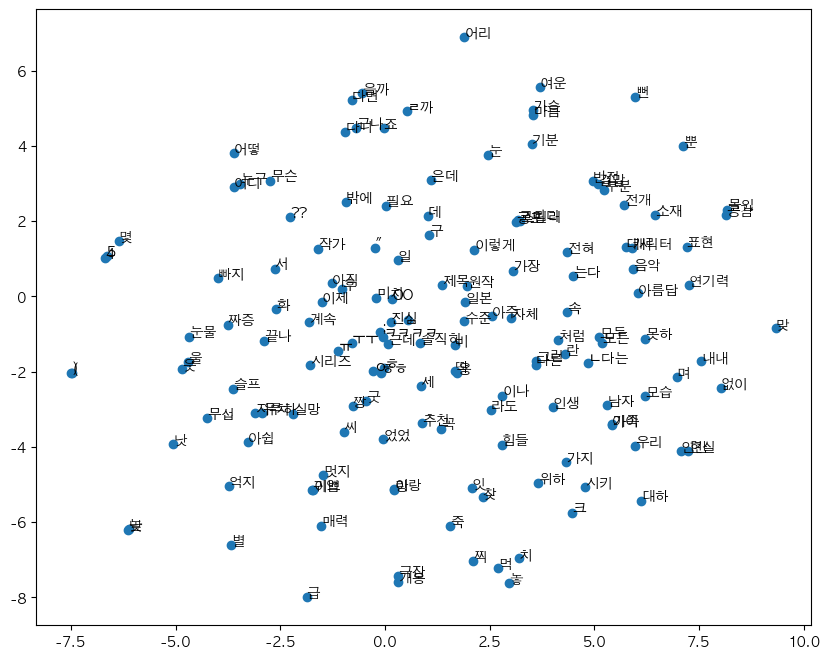

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

start = 200
n = 150

word_vectors_array = np.array(word_vectors_list[start:start+n])

# t-SNE 적용
model_tsne = TSNE(learning_rate=100)
transformed = model_tsne.fit_transform(word_vectors_array)

# 시각화
xs2 = transformed[:, 0]
ys2 = transformed[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(xs2, ys2)

for i, v in enumerate(vocabs[start:start+n]):
    plt.annotate(v, xy=(xs2[i], ys2[i]))

plt.show()